In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([2, 0, 1])

Y_pred_good = torch.tensor([[1.0, 1.0, 2.1], [2.0, 1.0, 0.1], [2.0, 5.0, 0.1]])
Y_pred_bad = torch.tensor([[1.0, 2.0, 1.1], [2.0, 2.0, 0.1], [5.0, 5.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1, l2)

tensor(0.3277) tensor(0.9785)


In [4]:
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

tensor([2, 0, 1])
tensor([1, 0, 0])


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
#hyper parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='.', train=False, transform=transforms.ToTensor())


In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)


In [8]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


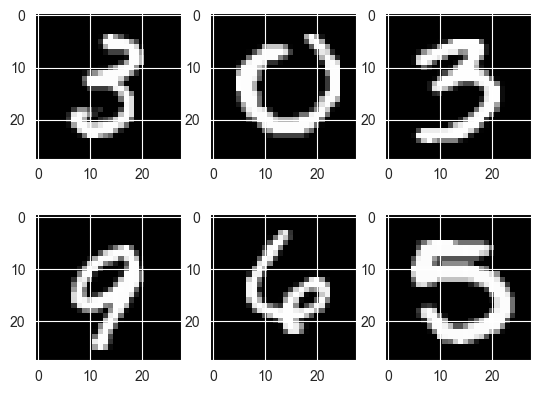

In [9]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [11]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out


model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
             print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.4574
Epoch [1/2], Step [200/600], Loss: 0.4636
Epoch [1/2], Step [300/600], Loss: 0.2234
Epoch [1/2], Step [400/600], Loss: 0.2678
Epoch [1/2], Step [500/600], Loss: 0.3595
Epoch [1/2], Step [600/600], Loss: 0.2240
Epoch [2/2], Step [100/600], Loss: 0.1867
Epoch [2/2], Step [200/600], Loss: 0.1319
Epoch [2/2], Step [300/600], Loss: 0.1783
Epoch [2/2], Step [400/600], Loss: 0.1552
Epoch [2/2], Step [500/600], Loss: 0.1947
Epoch [2/2], Step [600/600], Loss: 0.1938


In [12]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.43 %
